In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Grid Searches
=================

<img src="figures/grid_search_cross_validation.svg" width=100%>

Grid-Search with build-in cross validation

In [2]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

In [3]:
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target)

Define parameter grid:

In [4]:
import numpy as np

param_grid = {'C': 10. ** np.arange(-3, 3),
              'gamma' : 10. ** np.arange(-5, 0)}

np.set_printoptions(suppress=True)
print(param_grid)

{'C': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ]), 'gamma': array([ 0.00001,  0.0001 ,  0.001  ,  0.01   ,  0.1    ])}


In [5]:
grid_search = GridSearchCV(SVC(), param_grid, verbose=3)

A GridSearchCV object behaves just like a normal classifier.

In [6]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................... C=0.001, gamma=1e-05, score=0.105960 -   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................... C=0.001, gamma=1e-05, score=0.106904 -   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................... C=0.001, gamma=1e-05, score=0.105618 -   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] .................. C=0.001, gamma=0.0001, score=0.105960 -   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] .................. C=0.001, gamma=0.0001, score=0.106904 -   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] .................. C=0.001, gamma=0.0001, score=0.105618 -   0.2s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  32 jobs       | elapsed:    5.4s



[CV] C=0.1, gamma=1e-05 ..............................................
[CV] ..................... C=0.1, gamma=1e-05, score=0.105618 -   0.2s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.812362 -   0.2s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.819599 -   0.2s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.811236 -   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.966887 -   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.955457 -   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.946067 -   0.1s
[CV] 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   12.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ]), 'gamma': array([ 0.00001,  0.0001 ,  0.001  ,  0.01   ,  0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=3)

In [7]:
grid_search.predict(X_test)

array([4, 6, 2, 2, 7, 0, 0, 2, 9, 4, 1, 3, 8, 4, 9, 5, 7, 7, 3, 5, 4, 3, 9,
       6, 0, 5, 7, 9, 1, 7, 6, 4, 7, 0, 8, 4, 3, 0, 0, 4, 2, 2, 3, 0, 0, 8,
       5, 2, 7, 0, 7, 7, 8, 3, 3, 6, 3, 6, 8, 1, 9, 5, 2, 2, 2, 6, 3, 2, 2,
       6, 0, 6, 5, 8, 4, 9, 1, 6, 3, 0, 5, 9, 3, 1, 9, 1, 1, 9, 9, 9, 2, 2,
       9, 2, 2, 0, 0, 8, 4, 2, 8, 0, 3, 1, 6, 8, 8, 5, 3, 7, 2, 1, 1, 7, 1,
       2, 8, 1, 6, 3, 3, 4, 2, 1, 3, 9, 7, 3, 6, 6, 1, 8, 0, 2, 6, 0, 8, 6,
       9, 8, 1, 5, 8, 8, 4, 4, 5, 3, 3, 0, 4, 9, 6, 0, 8, 6, 7, 0, 0, 5, 1,
       9, 2, 7, 9, 9, 4, 8, 4, 8, 1, 0, 8, 8, 3, 6, 2, 5, 0, 3, 7, 9, 9, 0,
       7, 7, 6, 1, 7, 3, 6, 6, 1, 5, 8, 4, 8, 9, 9, 6, 1, 8, 3, 5, 9, 8, 7,
       7, 9, 3, 7, 9, 5, 0, 6, 3, 4, 4, 2, 1, 2, 2, 2, 7, 3, 3, 5, 7, 2, 4,
       0, 3, 9, 7, 0, 5, 7, 0, 7, 4, 6, 6, 3, 9, 4, 7, 1, 5, 4, 5, 4, 4, 7,
       3, 7, 7, 6, 9, 0, 3, 0, 1, 1, 3, 9, 3, 2, 6, 1, 3, 9, 1, 4, 0, 2, 5,
       8, 1, 4, 0, 8, 9, 1, 1, 6, 5, 2, 7, 6, 6, 2, 8, 5, 5, 4, 7, 4, 2, 2,
       1, 1,

In [8]:
grid_search.score(X_test, y_test)

0.99555555555555553

In [9]:
grid_search.best_params_

{'C': 10.0, 'gamma': 0.001}

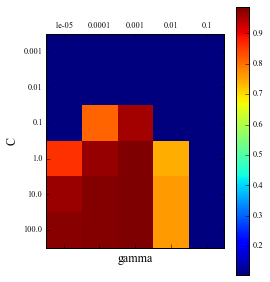

In [10]:
# We extract just the scores

scores = [x.mean_validation_score for x in grid_search.grid_scores_]
scores = np.array(scores).reshape(6, 5)

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(5), param_grid['gamma'])
plt.yticks(np.arange(6), param_grid['C']);

Nested Cross-validation in scikit-learn:

In [11]:
from sklearn.cross_validation import cross_val_score
cross_val_score(GridSearchCV(SVC(), param_grid),
                digits.data, digits.target)

array([ 0.9717608 ,  0.98163606,  0.97483221])

# Exercises
Use GridSearchCV to adjust n_neighbors of KNeighborsClassifier.


In [ ]:
# %load solutions/grid_search_k_neighbors.py

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
KNeighborsClassifier?

In [40]:
KNC_grid = {'n_neighbors': range(1,40,2), 
              'leaf_size' : range(1,40,2)}

grid_search = GridSearchCV(KNeighborsClassifier(), KNC_grid, verbose=3)

In [41]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
[CV] n_neighbors=1, leaf_size=1 ......................................
[CV] ............. n_neighbors=1, leaf_size=1, score=0.984547 -   0.2s
[CV] n_neighbors=1, leaf_size=1 ......................................
[CV] ............. n_neighbors=1, leaf_size=1, score=0.982183 -   0.2s
[CV] n_neighbors=1, leaf_size=1 ......................................
[CV] ............. n_neighbors=1, leaf_size=1, score=0.975281 -   0.2s
[CV] n_neighbors=3, leaf_size=1 ......................................
[CV] ............. n_neighbors=3, leaf_size=1, score=0.986755 -   0.2s
[CV] n_neighbors=3, leaf_size=1 ......................................
[CV] ............. n_neighbors=3, leaf_size=1, score=0.979955 -   0.2s
[CV] n_neighbors=3, leaf_size=1 ......................................
[CV] ............. n_neighbors=3, leaf_size=1, score=0.975281 -   0.3s
[CV] n_neighbors=5, leaf_size=1 ......................................
[CV] ........

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  32 jobs       | elapsed:   10.6s



[CV] n_neighbors=21, leaf_size=1 .....................................
[CV] ............ n_neighbors=21, leaf_size=1, score=0.957303 -   0.4s
[CV] n_neighbors=23, leaf_size=1 .....................................
[CV] ............ n_neighbors=23, leaf_size=1, score=0.964680 -   0.4s
[CV] n_neighbors=23, leaf_size=1 .....................................
[CV] ............ n_neighbors=23, leaf_size=1, score=0.955457 -   0.4s
[CV] n_neighbors=23, leaf_size=1 .....................................
[CV] ............ n_neighbors=23, leaf_size=1, score=0.952809 -   0.4s
[CV] n_neighbors=25, leaf_size=1 .....................................
[CV] ............ n_neighbors=25, leaf_size=1, score=0.966887 -   0.4s
[CV] n_neighbors=25, leaf_size=1 .....................................
[CV] ............ n_neighbors=25, leaf_size=1, score=0.953229 -   0.5s
[CV] n_neighbors=25, leaf_size=1 .....................................
[CV] ............ n_neighbors=25, leaf_size=1, score=0.948315 -   0.5s
[CV] 

[Parallel(n_jobs=1)]: Done 128 jobs       | elapsed:   36.4s
[Parallel(n_jobs=1)]: Done 288 jobs       | elapsed:   53.6s



[CV] n_neighbors=33, leaf_size=9 .....................................
[CV] ............ n_neighbors=33, leaf_size=9, score=0.955850 -   0.1s
[CV] n_neighbors=33, leaf_size=9 .....................................
[CV] ............ n_neighbors=33, leaf_size=9, score=0.939866 -   0.1s
[CV] n_neighbors=33, leaf_size=9 .....................................
[CV] ............ n_neighbors=33, leaf_size=9, score=0.939326 -   0.1s
[CV] n_neighbors=35, leaf_size=9 .....................................
[CV] ............ n_neighbors=35, leaf_size=9, score=0.955850 -   0.1s
[CV] n_neighbors=35, leaf_size=9 .....................................
[CV] ............ n_neighbors=35, leaf_size=9, score=0.935412 -   0.1s
[CV] n_neighbors=35, leaf_size=9 .....................................
[CV] ............ n_neighbors=35, leaf_size=9, score=0.934831 -   0.1s
[CV] n_neighbors=37, leaf_size=9 .....................................
[CV] ............ n_neighbors=37, leaf_size=9, score=0.955850 -   0.1s
[CV] 

[Parallel(n_jobs=1)]: Done 512 jobs       | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done 800 jobs       | elapsed:  1.4min



[CV] n_neighbors=13, leaf_size=27 ....................................
[CV] ........... n_neighbors=13, leaf_size=27, score=0.959551 -   0.1s
[CV] n_neighbors=15, leaf_size=27 ....................................
[CV] ........... n_neighbors=15, leaf_size=27, score=0.984547 -   0.1s
[CV] n_neighbors=15, leaf_size=27 ....................................
[CV] ........... n_neighbors=15, leaf_size=27, score=0.964365 -   0.1s
[CV] n_neighbors=15, leaf_size=27 ....................................
[CV] ........... n_neighbors=15, leaf_size=27, score=0.961798 -   0.1s
[CV] n_neighbors=17, leaf_size=27 ....................................
[CV] ........... n_neighbors=17, leaf_size=27, score=0.975717 -   0.1s
[CV] n_neighbors=17, leaf_size=27 ....................................
[CV] ........... n_neighbors=17, leaf_size=27, score=0.962138 -   0.1s
[CV] n_neighbors=17, leaf_size=27 ....................................
[CV] ........... n_neighbors=17, leaf_size=27, score=0.959551 -   0.1s
[CV] 

[Parallel(n_jobs=1)]: Done 1152 jobs       | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39], 'leaf_size': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=3)

In [42]:
grid_search.predict(X_test)

array([4, 6, 2, 2, 7, 0, 0, 2, 9, 4, 1, 3, 8, 4, 9, 5, 7, 7, 3, 5, 4, 3, 9,
       6, 0, 5, 7, 9, 1, 7, 6, 4, 7, 0, 8, 4, 3, 0, 0, 4, 2, 2, 3, 0, 0, 8,
       5, 2, 7, 0, 7, 7, 8, 3, 3, 6, 3, 6, 8, 1, 9, 5, 2, 2, 2, 6, 3, 2, 2,
       6, 0, 6, 5, 8, 4, 9, 1, 6, 3, 0, 5, 9, 3, 1, 9, 1, 1, 9, 9, 9, 2, 2,
       9, 2, 2, 0, 0, 8, 4, 2, 8, 0, 3, 1, 6, 8, 8, 5, 3, 7, 2, 1, 1, 7, 1,
       2, 8, 1, 6, 3, 3, 4, 2, 1, 3, 9, 7, 3, 6, 6, 1, 1, 0, 2, 6, 0, 8, 6,
       9, 8, 1, 5, 8, 8, 4, 4, 5, 3, 3, 0, 4, 9, 6, 0, 8, 6, 7, 0, 0, 5, 1,
       9, 2, 7, 9, 9, 4, 8, 4, 8, 1, 0, 8, 8, 3, 6, 2, 5, 0, 3, 7, 9, 9, 0,
       7, 7, 6, 1, 7, 3, 6, 6, 1, 5, 8, 4, 8, 9, 9, 6, 1, 8, 3, 5, 9, 8, 7,
       7, 9, 3, 7, 9, 5, 0, 6, 3, 4, 4, 2, 1, 2, 1, 2, 7, 3, 3, 5, 7, 2, 4,
       0, 3, 9, 7, 0, 5, 7, 0, 7, 4, 6, 6, 3, 9, 4, 7, 1, 5, 4, 5, 4, 4, 7,
       3, 7, 7, 6, 9, 0, 3, 0, 1, 1, 3, 9, 3, 2, 6, 1, 3, 9, 1, 4, 0, 2, 5,
       8, 1, 4, 0, 8, 9, 1, 1, 6, 5, 2, 7, 6, 6, 2, 8, 5, 5, 4, 7, 4, 2, 2,
       1, 1,

In [43]:
grid_search.score(X_test, y_test)

0.98888888888888893

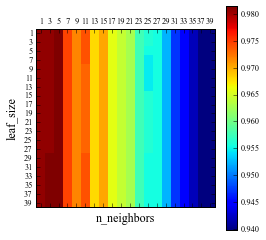

In [45]:
scores = [x.mean_validation_score for x in grid_search.grid_scores_]
scores = np.array(scores).reshape(len(KNC_grid['n_neighbors']), len(KNC_grid['leaf_size']))

plt.matshow(scores)
plt.xlabel('n_neighbors')
plt.ylabel('leaf_size')
plt.colorbar()
plt.xticks(range(len(KNC_grid['n_neighbors'])), KNC_grid['n_neighbors'])
plt.yticks(range(len(KNC_grid['leaf_size'])), KNC_grid['leaf_size']);